In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [2]:
# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
# Convert labels to one-hot encoded format
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


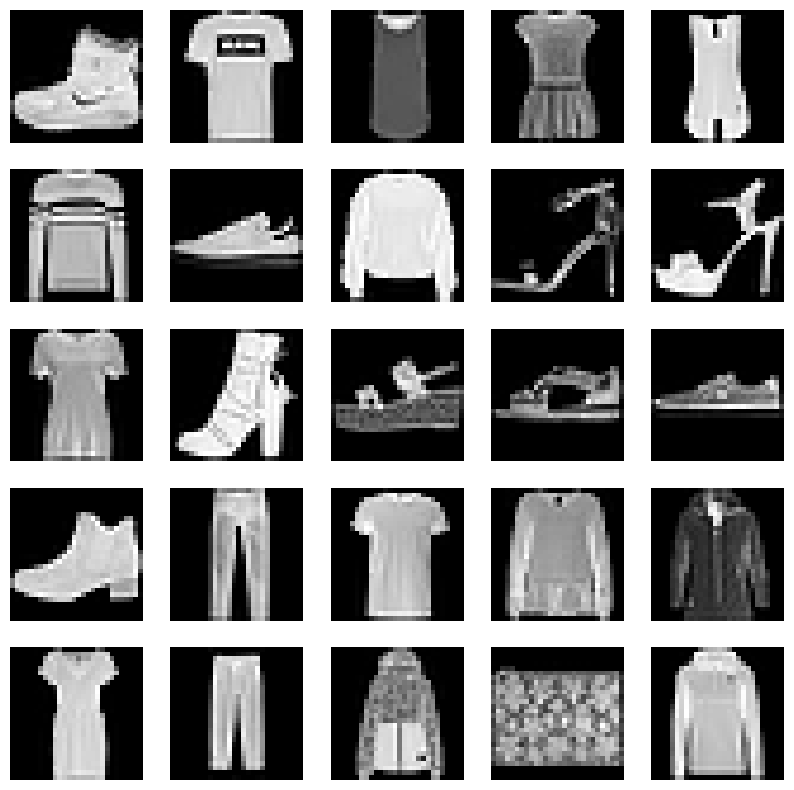

In [5]:
# Data visualization
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
plt.show()


In [6]:
# Define the model architecture
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [7]:
# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


In [8]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10


1500/1500 [==============================] - 8s 4ms/step - loss: 0.8087 - accuracy: 0.7316 - val_loss: 0.5743 - val_accuracy: 0.7943
Epoch 2/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.5203 - accuracy: 0.8192 - val_loss: 0.4988 - val_accuracy: 0.8207
Epoch 3/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.4719 - accuracy: 0.8347 - val_loss: 0.5083 - val_accuracy: 0.8246
Epoch 4/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.4452 - accuracy: 0.8441 - val_loss: 0.4331 - val_accuracy: 0.8500
Epoch 5/10
1500/1500 [==============================] - 11s 8ms/step - loss: 0.4249 - accuracy: 0.8514 - val_loss: 0.4214 - val_accuracy: 0.8534
Epoch 6/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.4086 - accuracy: 0.8560 - val_loss: 0.4182 - val_accuracy: 0.8548
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3953 - accuracy: 0.8595 - val_loss: 0.4012 - val_acc

In [9]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_accuracy}")


313/313 - 1s - loss: 0.4097 - accuracy: 0.8546 - 1s/epoch - 4ms/step
Test accuracy: 0.8546000123023987


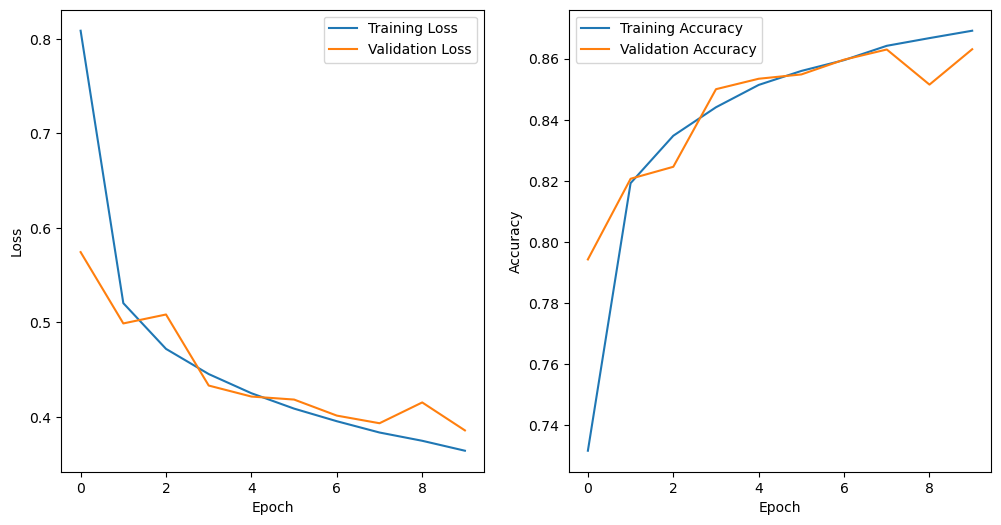

In [10]:
# Plot the training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()